# AST 4930 Module 1


## k-nearest neighbors & decision trees

### Let's load the scikit-learn module and load the Iris dataset.

In [1]:
#If you need to install sklearn on your machine, see https://scikit-learn.org/stable/install.html
from sklearn import datasets

#load Iris data (sklearn offers quite a few datasets)
iris = datasets.load_iris()

### What's in the dataset? When you have no idea what the dataset looks like, use help.

In [2]:
help(iris)

Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __getitem__(self, key)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(sel

### So iris is a "Bunch" object (which is similar to dictionary). If you want to see what "keys" exist,


In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Let's print out the description first.

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### What's in target_names?

In [5]:
# We can use either iris.target_names or iris['target_names']
iris.target_names 
#iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### What's in feature_names?

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Let's have a look at the data.

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Let's check out the shape of the data array.

In [8]:
iris.data.shape

(150, 4)

### Let's visualize the data -- Petal width vs. Petal length. Since our goal is to classify the data, it might be wise to color-code the data points by target name.


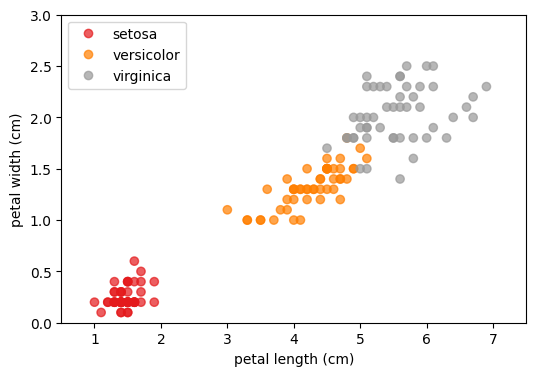

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

#This is to make sure that the color scale uses minimum = 0 & maximum = 2.
norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

plot = ax.scatter(iris.data[:,2], iris.data[:,3], alpha=0.7, c=iris.target, cmap='Set1', norm=norm)

ax.set_xlim(0.5,7.5)
ax.set_ylim(0.,3)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot.legend_elements()[0], iris.target_names)

plt.savefig('iris.png', transparent=True, dpi=300)

### Let's first use kNN to make a model that can predict the class of new data points based on petal length and width.

In [10]:
from sklearn import neighbors

### Prepare the data for the ML algorithm.

In [11]:
from sklearn.model_selection import train_test_split

#Features in "X" (matrix), label in "y" (vector)
X = iris.data[:,2:]
y = iris.target

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

### Let's check the data shape

In [13]:
X_train.shape, X_test.shape

((112, 2), (38, 2))

### We can also visualize train/test datasets.

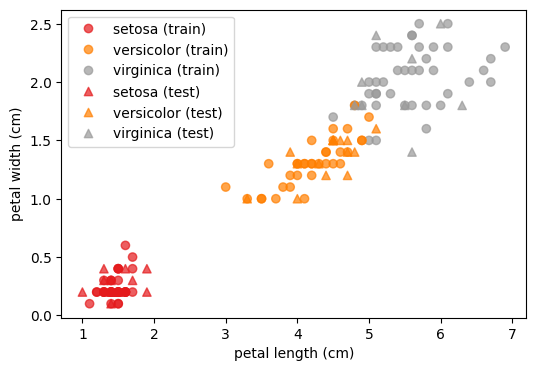

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='Set1', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='Set1', norm=norm, marker='^')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### For kNN, we need feature scaling.

In [15]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

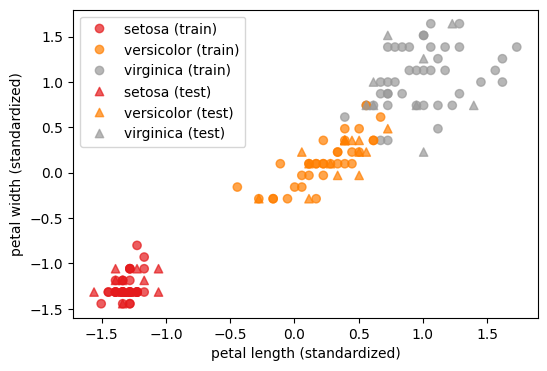

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.7, c=y_train, cmap='Set1', norm=norm)
plot_test = ax.scatter(X_test_scaled[:,0], X_test_scaled[:,1], alpha=0.7, c=y_test, cmap='Set1', norm=norm, marker='^')

ax.set_xlabel('petal length (standardized)')
ax.set_ylabel('petal width (standardized)')
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

plt.savefig('iris_scaling.png', transparent=True, dpi=300)

### Train the machine

In [17]:
# Train a kNN Model with k=3
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [18]:
help(neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [19]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [20]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Training accuracy

In [21]:
model.score(X_train_scaled, y_train)

0.9642857142857143

### Test accuracy

In [22]:
model.score(X_test_scaled, y_test)

0.9736842105263158

### Always try to look into the details of the result. If you don't, ML will stay as a black box for you!

In [23]:
print('True label:\n', y_test)
print('Prediction:\n', model.predict(X_test_scaled))

True label:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [24]:
import numpy as np

ind_wrong = np.where(y_test != model.predict(X_test_scaled))[0][0]
ind_wrong

37

In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors
    
model.kneighbors([X_test_scaled[ind_wrong]])
ind_neighbors = model.kneighbors([X_test_scaled[ind_wrong]])[1].flatten()
ind_neighbors

array([17, 95, 10])

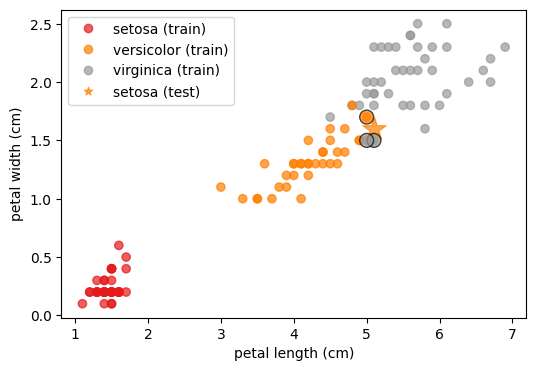

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='Set1', norm=norm)
plot_test = ax.scatter(X_test[ind_wrong,0], X_test[ind_wrong,1], alpha=0.7, c=y_test[-1], cmap='Set1', norm=norm, 
                       marker='*', s=300)
plot_neighbors = ax.scatter(X_train[ind_neighbors,0], X_train[ind_neighbors,1], 
                            alpha=0.7, c=y_train[ind_neighbors], cmap='Set1', 
                            norm=norm, edgecolor='k', s=100)

#ax.scatter(new_data[:,0], new_data[:,1], alpha=1, 
#           c=model.predict(new_data_scaled), cmap='viridis', norm=norm, marker='*', s=200)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

In [27]:
model.predict_proba(X_test_scaled)

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.

### New data and model prediction

In [28]:
import numpy as np

new_data = np.array([[2, 1], [5, 1], [4.7, 2]])

In [29]:
new_data_scaled = StandardScaler().fit(X_train).transform(new_data)
new_data_scaled

array([[-1.00211332, -0.28693357],
       [ 0.671396  , -0.28693357],
       [ 0.50404507,  0.99852882]])

In [30]:
model.predict(new_data_scaled)

array([0, 1, 2])

### Let's visualize to see if it makes sense.

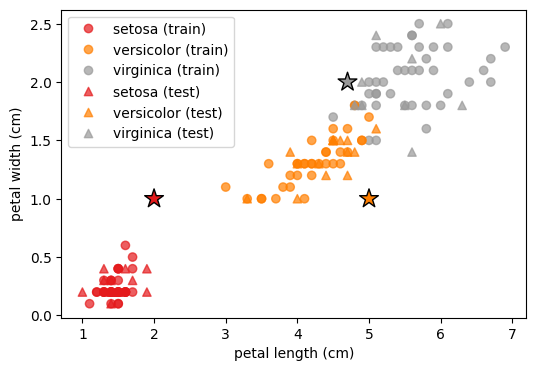

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='Set1', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='Set1', norm=norm, marker='^')

ax.scatter(new_data[:,0], new_data[:,1], alpha=1, 
           c=model.predict(new_data_scaled), cmap='Set1', norm=norm, marker='*', s=200, edgecolor='k')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### Let's compute the decision boundary.

In [32]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(x_min, x_max, y_min, y_max)

0.0 7.9 -0.9 3.5


In [33]:
#I just wanted to make sure that the values are physical. 
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

print(x_min, x_max, y_min, y_max)

0.0 7.9 0.0 3.5


### Make a two-dimensional grid using numpy.meshgrid

In [34]:
#See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


### How does the mesh look like?

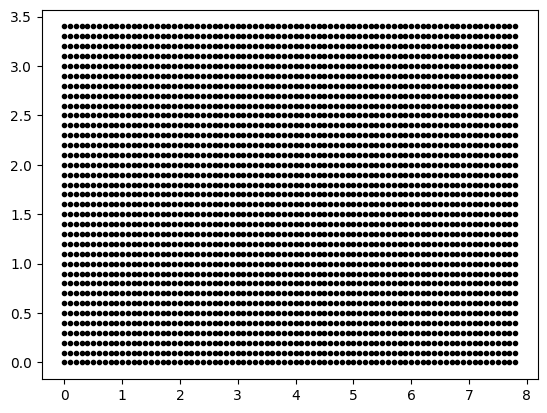

In [35]:
plt.plot(xpts, ypts, ".k")
plt.show()

### For each point, we make model prediction.

In [36]:
#This is to make a data structure that is consistent with the training/test datasets.

grid_scaled = StandardScaler().fit(X_train).transform(np.c_[xpts.ravel(), ypts.ravel()])

Z = model.predict(grid_scaled)

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(xpts.shape)

### Let's visualize the decision boundary.

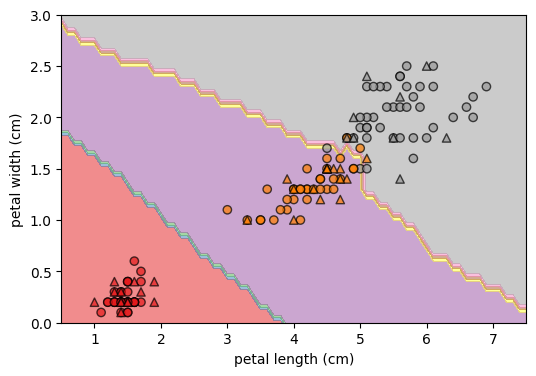

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))

#Two-dimensional contour plot.
#See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
ax.contourf(xpts, ypts, Z, alpha=0.5, cmap='Set1')

#Let's over-plot training/test data points.
plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='Set1', 
                        norm=norm, edgecolor='black')
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='Set1', 
                       norm=norm, marker='^', edgecolor='black')

ax.set_xlim(0.5,7.5)
ax.set_ylim(0.,3)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

plt.savefig('iris_knn.png', transparent=True, dpi=300)

### TODO: We used k=3 for the example above. Vary the number of neighbors from 1 to 30 (hint: use a for loop.) and check how training and test accuracy change by making a plot showing training/test accuracy vs. k. 

### Now, let's try Decision Trees.

In [38]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=2, random_state=0)

In [39]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [40]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [41]:
model.score(X_train, y_train)

0.9642857142857143

In [42]:
model.score(X_test, y_test)

0.8947368421052632

### Visualize the tree structure.

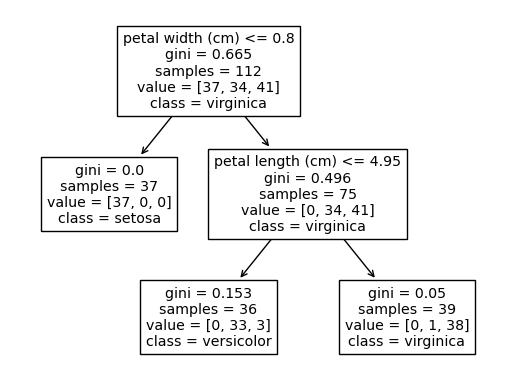

In [47]:
plot_tree(model, feature_names=iris.feature_names[2:], class_names=list(iris.target_names))
print('') #This is simply to suppress the massive output texts.

In [48]:
print('True label:\n', y_test)
print('Prediction:\n', model.predict(X_test))

True label:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2]


### Let's visualize the decision boundary.

In [49]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#I just wanted to make sure that the values are physical. 
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

#See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

#This is to make a data structure that is consistent with the training/test datasets.
Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(xpts.shape)

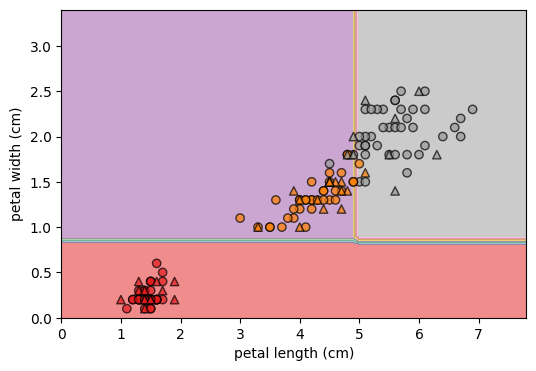

In [50]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.contourf(xpts, ypts, Z, alpha=0.5, cmap='Set1')

#Let's over-plot training/test data points.
plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.7, c=y_train, cmap='Set1', 
                        norm=norm, edgecolor='black')
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.7, c=y_test, cmap='Set1', 
                       norm=norm, marker='^', edgecolor='black')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

plt.savefig('iris_dt.png', transparent=True, dpi=300)

### One of the cool things about DT is that we can check feature importance.

In [51]:
print(iris.feature_names[2:])
print(model.feature_importances_)

['petal length (cm)', 'petal width (cm)']
[0.44366614 0.55633386]


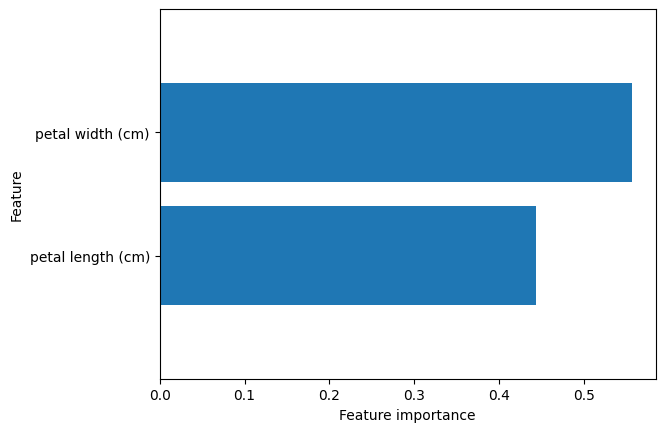

In [52]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names[2:])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

### TODO: Does DT work better if we increase max_depth? Vary max_depth parameter from 1 to 6 and check training/test accuracy.

### TODO: Does DT work better if we increase min_samples_leaf? Vary min_samples_leaf parameter from 1 to 6 and check training/test accuracy.

### Let's use all the features now.

In [53]:
#load Iris data
iris = datasets.load_iris()

#Features in "X" (matrix), label in "y" (vector)
X = iris.data
y = iris.target

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Train DT
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
print(iris.feature_names)
print(model.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.42232109 0.57767891]


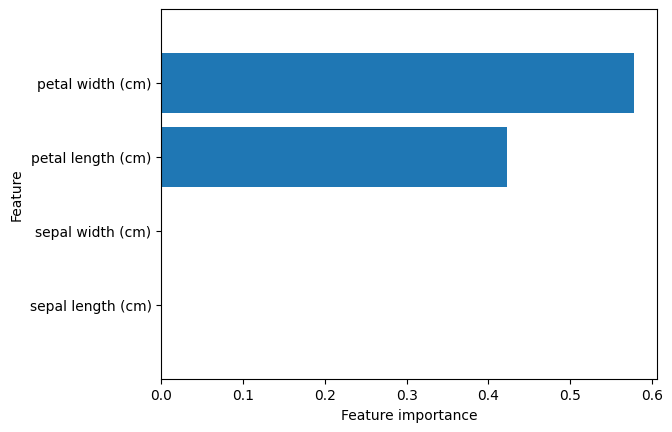

In [55]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)